# Analyzing Baby Names

In [1]:
import pandas as pd
from matplotlib.pylab import plt 
%matplotlib inline
import numpy as np
from random import sample

# Read and Write data

### Read the file yob2000.txt 

In [2]:
df_2000 = pd.read_csv('yob2000.txt' , names=['name', 'gender', 'births'])
df_2000

,name,gender,births
0,Emily,F,25953
1,Hannah,F,23080
2,Madison,F,19967
3,Ashley,F,17997
4,Sarah,F,17697
5,Alexis,F,17629
6,Samantha,F,17266
7,Jessica,F,15709
8,Elizabeth,F,15094
9,Taylor,F,15078


### Print the first 10 entries

In [3]:
first_10=df_2000.head(10)
first_10

,name,gender,births
0,Emily,F,25953
1,Hannah,F,23080
2,Madison,F,19967
3,Ashley,F,17997
4,Sarah,F,17697
5,Alexis,F,17629
6,Samantha,F,17266
7,Jessica,F,15709
8,Elizabeth,F,15094
9,Taylor,F,15078


### Write the data to a different file

In [4]:
df_write=first_10.to_csv('df_2000_first_10.txt')

# Calculate the total births

### Calculate the sum of the birth count column in the file yob2000.txt

In [5]:
total_births = df_2000['births'].sum()
total_births

3778079

# Separate boys / girls

### Calculate separate sums for boys and girls

In [6]:
boys_girls = df_2000.groupby('gender').sum()
boys_girls

,births
gender,
F,1815110
M,1962969


### Plot both sums in a bar plot

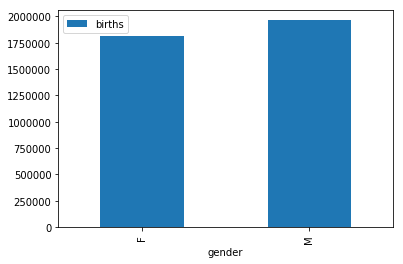

In [7]:
boys_girls.plot.bar()

# Frequent names

### Count how many names occur at least 1000 times in the file yob2000.txt

In [8]:
df_2000[df_2000['births'] >= 1000].count()

name      617
gender    617
births    617
dtype: int64

# Relative amount

### Create a new column containing the percentage of a name on the total births of a given year

In [9]:
temp = df_2000['births']/total_births
df_2000['percentage'] = temp*100
df_2000

,name,gender,births,percentage
0,Emily,F,25953,0.686936
1,Hannah,F,23080,0.610892
2,Madison,F,19967,0.528496
3,Ashley,F,17997,0.476353
4,Sarah,F,17697,0.468413
5,Alexis,F,17629,0.466613
6,Samantha,F,17266,0.457005
7,Jessica,F,15709,0.415793
8,Elizabeth,F,15094,0.399515
9,Taylor,F,15078,0.399092


### Verify that the sum of percentages is 100%.

In [10]:
df_2000['percentage'].sum()

99.99999999999999

### Calculate the percentage of the top 10 names on all births

In [11]:
top_10 = df_2000.sort_values(by='percentage', ascending=False)
top_10.head(10).births.sum()

267696

# Search your name

### Identify and print all lines containing your name in the year 2000

In [12]:
name_search = df_2000.set_index('name')
name_search.loc['Mary']

,gender,births,percentage
name,,,
Mary,F,6192,0.163893
Mary,M,10,0.000265


# Bar plot

### Create a bar plot showing 5 selected names for the year 2000

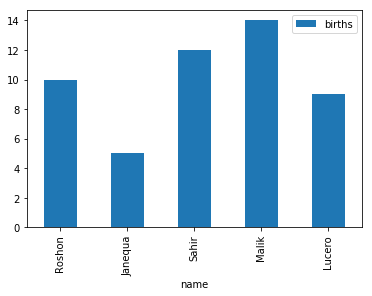

In [13]:
name_plot = df_2000.sample(n=5)
plot_5 = name_plot.plot.bar(x='name', y='births')
plot_5

# Read all names

### To read the complete dataset, we need to loop though all file names

In [14]:
years = range(1880,2017)
data = []
columns = ['name', 'gender', 'births']

for y in years:
    fn = 'yob' + str(y) + '.txt'
    df = pd.read_csv(fn, names=columns)
    df['years'] = y
    data.append(df)
df = pd.concat(data)
df

,name,gender,births,years
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


# Plot a time series

### Extract all rows containing your name from the variable df

In [15]:
my_name = df.set_index('name')

search_mary = my_name.loc['Mary']
search_mary

,gender,births,years
name,,,
Mary,F,7065,1880
Mary,M,27,1880
Mary,F,6919,1881
Mary,M,29,1881
Mary,F,8148,1882
Mary,M,30,1882
Mary,F,8012,1883
Mary,M,32,1883
Mary,F,9217,1884


### Plot the number of babies having your name and gender over time
### Make the plot nicer by adding row/column labels and a title
### Change the color and thickness of the line

Text(0.5, 1.0, 'Mary 1880-2017')

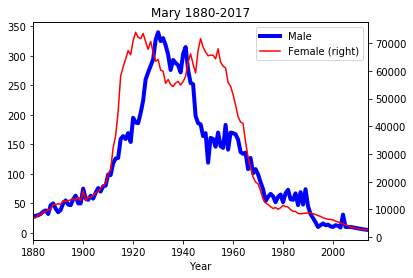

In [16]:
male_mary = search_mary.set_index('gender').loc['M']
male_mary.columns = ['Male', 'Year']

female_mary = search_mary.set_index('gender').loc['F']
female_mary.columns = ['Female','Year']

all_mary = pd.merge(male_mary, female_mary, on='Year')

ax = plt.gca()

all_mary.plot(kind = 'line', x='Year', y='Male', ax=ax, lw=4, color = 'blue')
all_mary.plot(kind = 'line', x='Year', y='Female', secondary_y=True, ax=ax, color = 'red')

plt.title('Mary 1880-2017')

### Save the plot as a high-resolution diagram

In [17]:
plt.savefig('Mary.png', dpi=1200)

<Figure size 432x288 with 0 Axes>

# Celebrities

### Plot time lines of names of celebrities
### Try actors, presidents, princesses, Star Wars, GoT, motorcycles, boot camp participants … 

Text(0.5, 1.0, 'Cristiano')

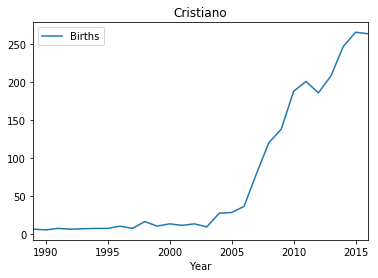

In [18]:
celeb_name = df.set_index('name')

celebrity = celeb_name.loc['Cristiano']
cristiano = celebrity.rename(columns={ 'births' : 'Births', 'years' : 'Year'})

ax=plt.gca()

cristiano.plot(kind = 'line', x='Year', y='Births', ax=ax)
plt.title('Cristiano')

# Normalize

### Divide the number of births by the total number of births in that year to obtain the relative frequency

In [19]:
lookup_table = df.groupby('years').births.sum()
lookup_table = lookup_table.reset_index()
df_new = pd.merge(lookup_table,df, on='years')
df_new['relative_frequency'] = df_new['births_y']/df_new['births_x']

### Plot the time series of your name or the celebrity names again

Text(0.5, 1.0, 'Cristiano_Relative_Frequency')

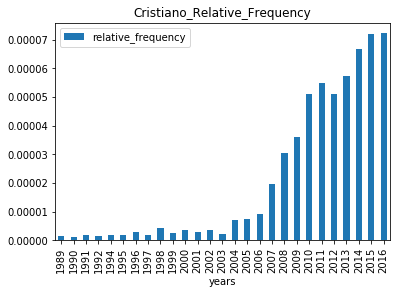

In [20]:
new_celeb_name = df_new.set_index('name')

celebrity = new_celeb_name.loc['Cristiano']

ax = plt.gca()

celebrity.plot(kind = 'bar', x='years', y='relative_frequency', ax=ax)
plt.title('Cristiano_Relative_Frequency')

# Name diversity

### Have the baby names become more diverse over time?

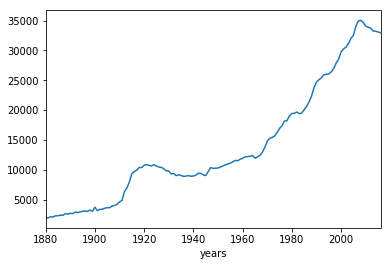

In [21]:
diversity = df.groupby('years').name.count()
diversity.plot.line()

# Long names

### Add an extra column that contains the length of the name

In [22]:
df['Name_length'] = df['name'].apply(len)

### Print the 10 longest names to the screen

In [23]:
longest_10 = df.sort_values(by='Name_length', ascending=False)
longest_10.head(10)

,name,gender,births,years,Name_length
9953,Mariadelosangel,F,6,1982,15
21340,Christopherjame,M,5,1988,15
21863,Ryanchristopher,M,8,1991,15
29329,Franciscojavier,M,5,2002,15
21647,Christopherjohn,M,6,1989,15
18478,Johnchristopher,M,5,1979,15
19478,Christopherjohn,M,6,1987,15
17902,Johnchristopher,M,8,1986,15
23544,Seanchristopher,M,5,1989,15
21341,Christopherjohn,M,5,1988,15


# First letter statistics

### Add an extra column that contains the first letter of the name

In [24]:
df['first_letter'] = df['name'].apply(lambda x: x[0])

### Count how many names start with ‘A’

In [25]:
new_count = df.set_index('first_letter')
count_A = new_count.loc['A']
count_A

,name,gender,births,years,Name_length
first_letter,,,,,
A,Anna,F,2604,1880,4
A,Alice,F,1414,1880,5
A,Annie,F,1258,1880,5
A,Ada,F,652,1880,3
A,Agnes,F,473,1880,5
A,Alma,F,277,1880,4
A,Addie,F,274,1880,5
A,Amanda,F,241,1880,6
A,Amelia,F,221,1880,6


### Plot the relative occurence of initials over time

Text(0.5, 1.0, 'First Occurance of A')

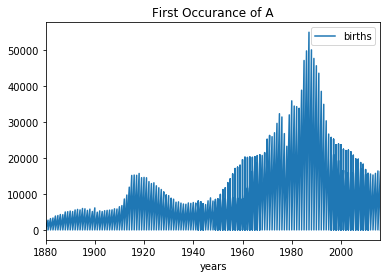

In [26]:
ax=plt.gca()

count_A.plot(kind = 'line', x='years', y='births', ax=ax)
plt.title('First Occurance of A')

### What can you conclude from your observations?

# Last letter statistics

### Add an extra column that contains the last letter of the name

In [27]:
df['last_letter']=df['name'].apply(lambda x: x[-1])

### Count how many names end with ‘A’

In [28]:
new_count_last = df.set_index('last_letter')
count_A_last = new_count_last.loc['a']
count_A_last.count()

name            490807
gender          490807
births          490807
years           490807
Name_length     490807
first_letter    490807
dtype: int64

### Plot the relative occurence of initials over time

Text(0.5, 1.0, 'Last Occurance of A')

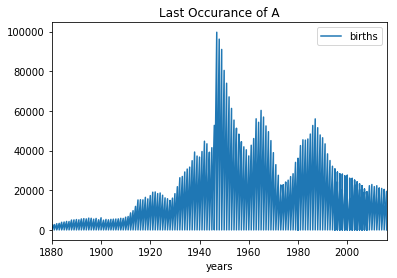

In [29]:
ax=plt.gca()

count_A_last.plot(kind = 'line', x='years', y='births', ax=ax)
plt.title('Last Occurance of A')

### Separate by boys/girls

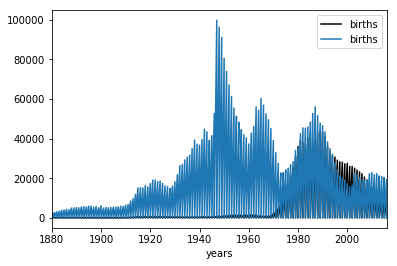

In [30]:
ax=plt.gca()

no_of_males = count_A_last.set_index('gender').loc['M']
no_of_females = count_A_last.set_index('gender').loc['F']

no_of_males.plot(kind = 'line', x='years', y='births', ax=ax, color = 'black')
no_of_females.plot(kind = 'line', x='years', y='births', ax=ax)

# e-rich Names

### Find all names that contain the character ‘e’ at least four times.

In [31]:
df['e_count'] = df['name'].str.count('e')

most_e = df.sort_values(by='e_count', ascending=False)
e_name = df[df['e_count'] >= 4]

e_name.count()
e_name

,name,gender,births,years,Name_length,first_letter,last_letter,e_count
201,Genevieve,F,59,1880,9,G,e,4
931,Tennessee,F,5,1880,9,T,e,4
196,Genevieve,F,58,1881,9,G,e,4
186,Genevieve,F,74,1882,9,G,e,4
629,Tennessee,F,10,1882,9,T,e,4
185,Genevieve,F,81,1883,9,G,e,4
197,Genevieve,F,89,1884,9,G,e,4
578,Tennessee,F,14,1884,9,T,e,4
203,Genevieve,F,87,1885,9,G,e,4
738,Tennessee,F,10,1885,9,T,e,4
